In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# **Load files**

In [2]:
# Load trained model
model = load_model('../artifacts/models/trained_model.keras')

# Test folder path
test_path = '../artifacts/dataset/test'

c:\Users\Mubashir\anaconda3\envs\classification-env\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# **Test Data Generator**

In [3]:
data_gen = ImageDataGenerator(rescale=1./255)

# Test data generator
test_generator = data_gen.flow_from_directory(
    test_path,
    batch_size=4,
    target_size=(224, 224),  # Adjust based on your model's input size
    class_mode='categorical',
    seed=42,
    shuffle=False
)

Found 40 images belonging to 4 classes.


In [4]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

 1/10 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 0.0031

c:\Users\Mubashir\anaconda3\envs\classification-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9699 - loss: 0.1064
Loss: 0.1428496539592743
Accuracy: 0.949999988079071


In [5]:
import json

# Load the classes from the JSON file
with open('../artifacts/dataset/fruits-and-vegetables.json') as f:
    json_data = json.load(f)

# Initialize an empty list
class_labels = []

# Add the classes from both "fruits" and "vegetables" to the list
class_labels.extend(json_data['fruits'])
class_labels.extend(json_data['vegetables'])

# Now class_labels contains all the class names
print(class_labels)

['apple', 'mango', 'potato', 'tomato']


# **Predict function**

In [6]:
def preprocess_image(image_path, target_size=(224, 224)):
    
    # Load Image
    img = load_img(image_path, target_size=target_size)
    
    img_array = img_to_array(img)
    
    img_array = np.expand_dims(img_array, axis=0)
    
    img_array = img_array / 255.0
    
    return img_array

In [7]:
def predict(image_path):
    
    # Preprocess the image
    img_array = preprocess_image(image_path)
    
    # Make the prediction
    predictions = model.predict(img_array)
    
    predicted_index = np.argmax(predictions[0])
    
    predicted_class = class_labels[predicted_index]
    
    print(predicted_class)
    
    return predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
apple


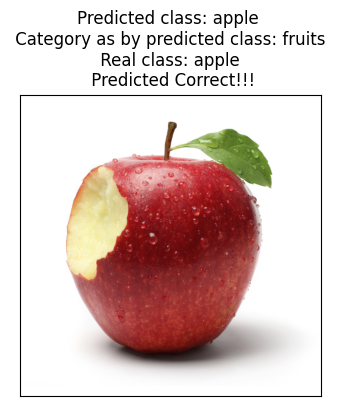

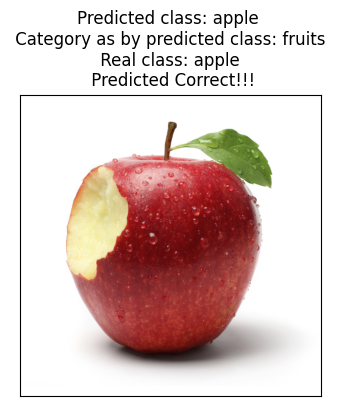

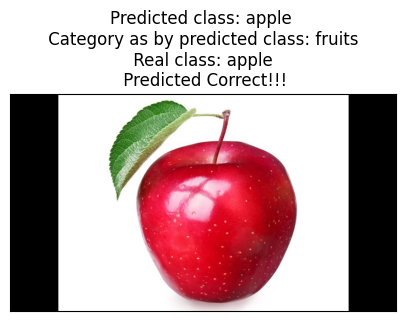

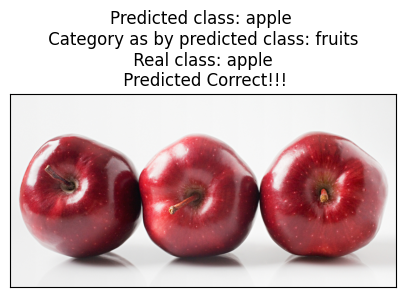

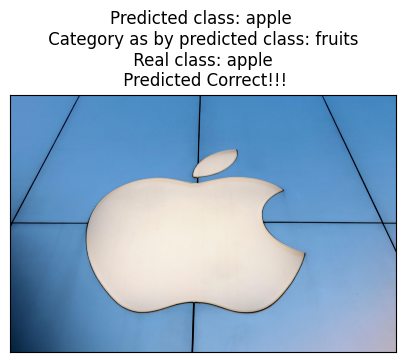

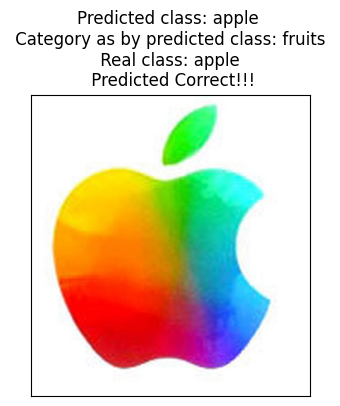

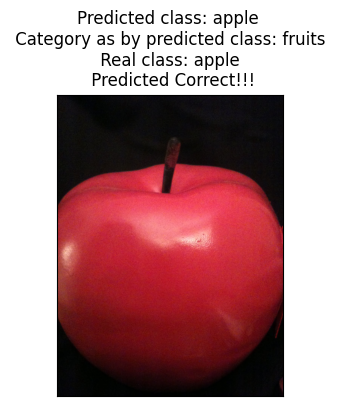

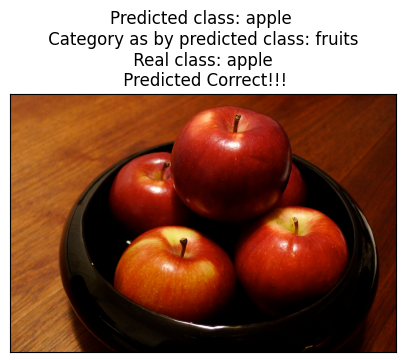

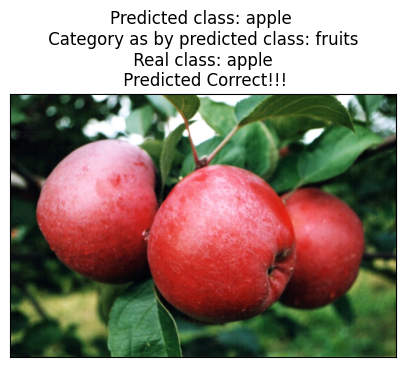

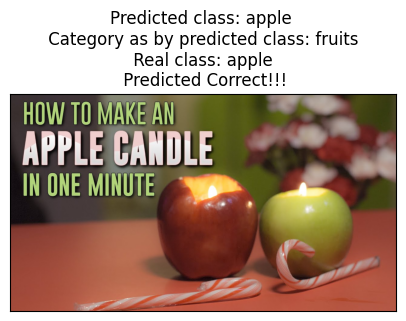

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
mango
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
mango
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
mango
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
mango
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
mango
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
mango
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
mango
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
mango
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
mango
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
mango


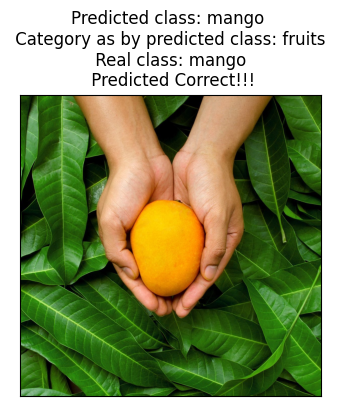

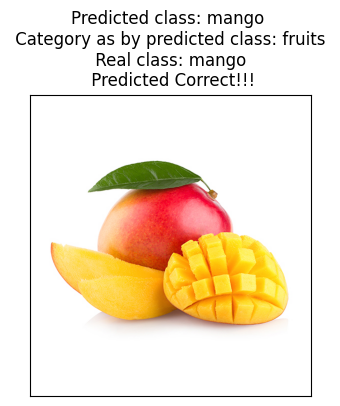

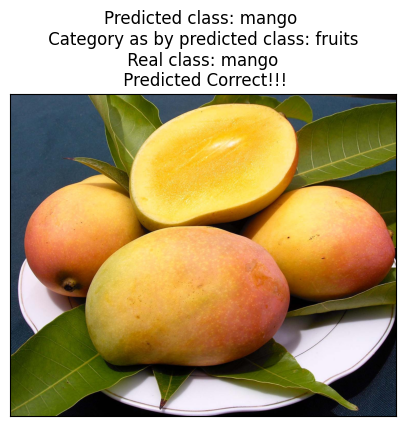

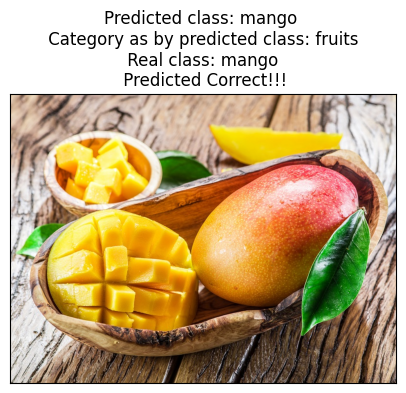

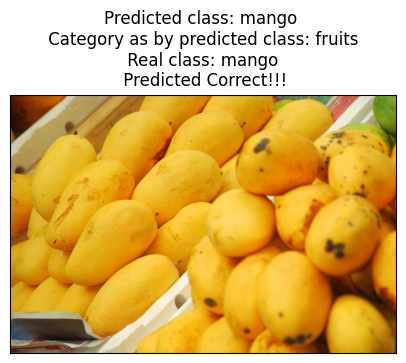

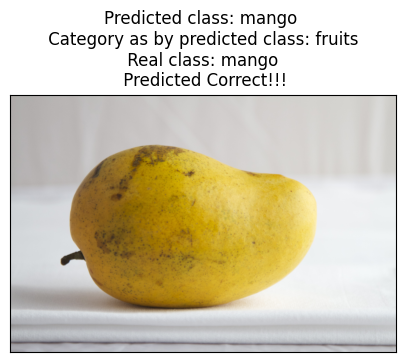

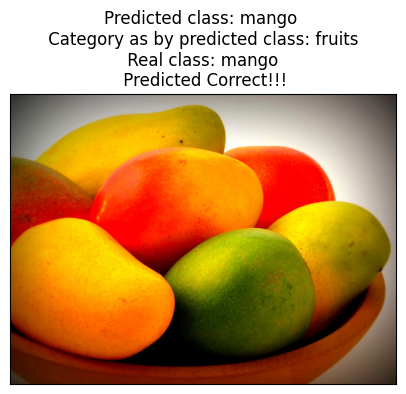

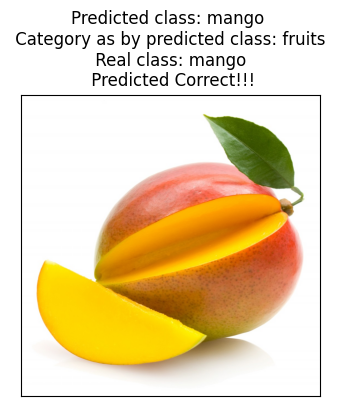

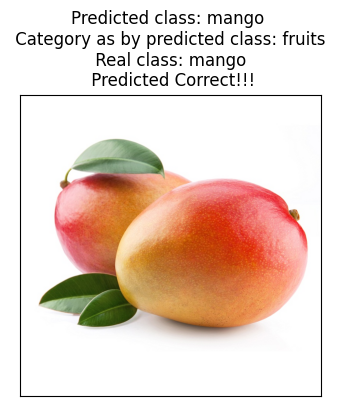

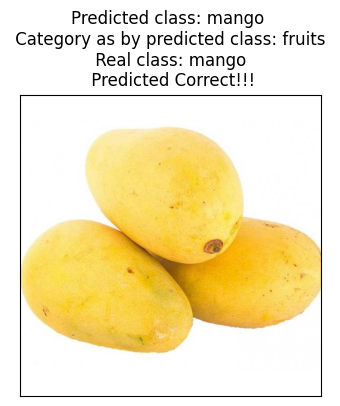

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
potato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
potato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
apple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
potato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
potato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
potato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
potato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
mango
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
potato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
potato


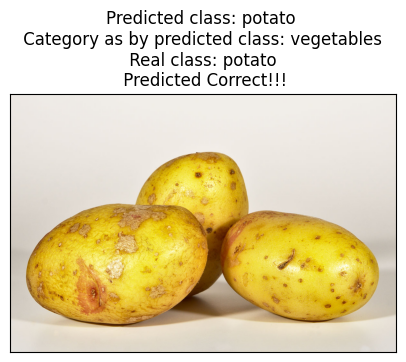

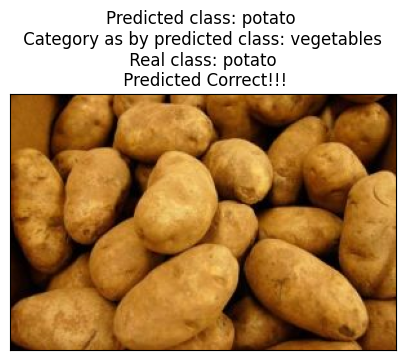

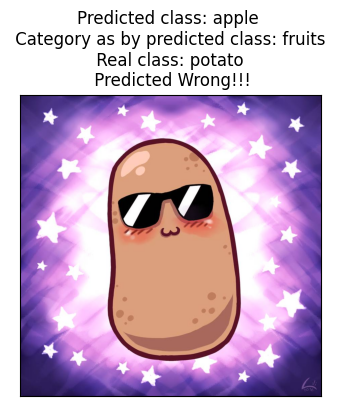

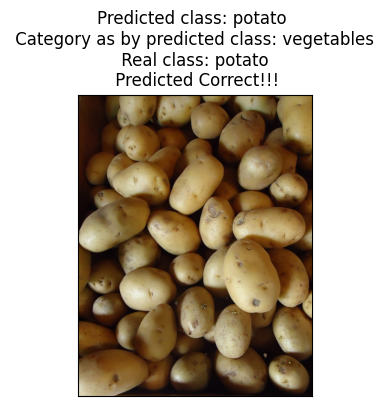

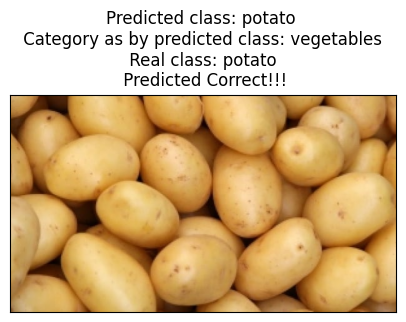

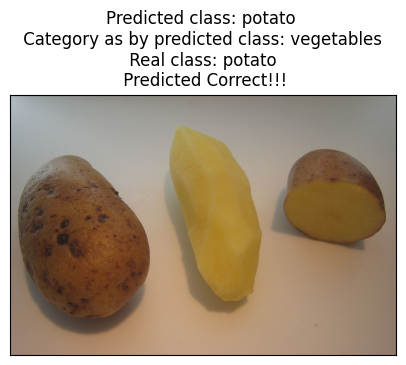

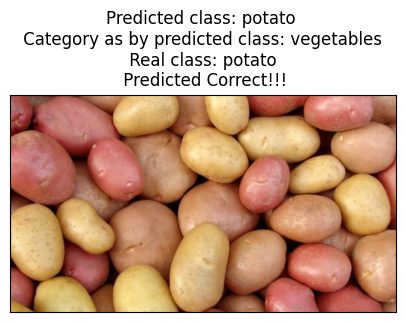

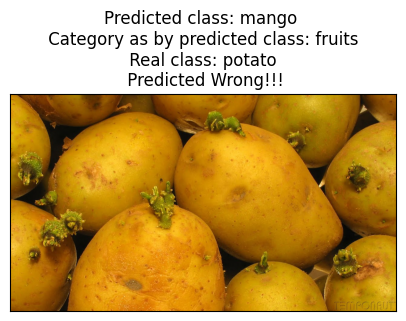

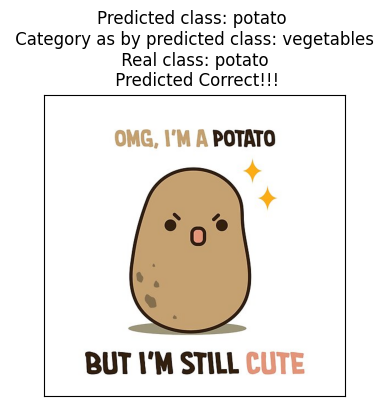

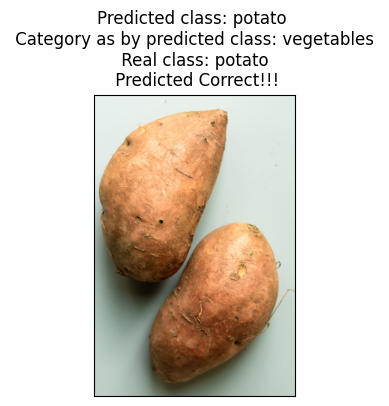

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
tomato


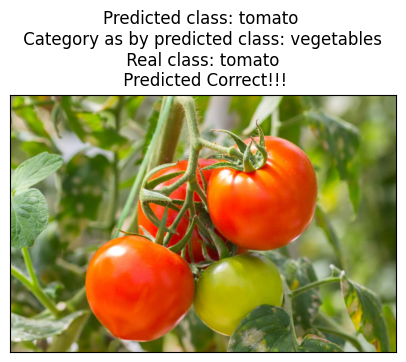

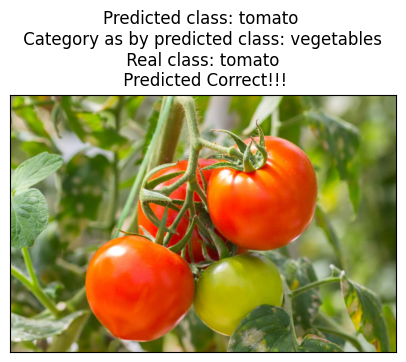

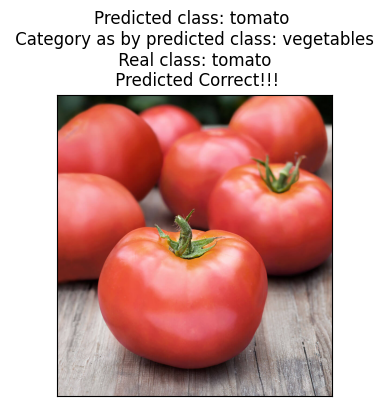

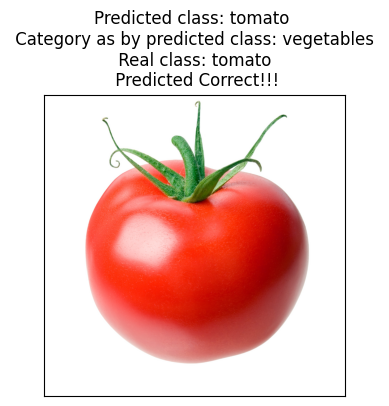

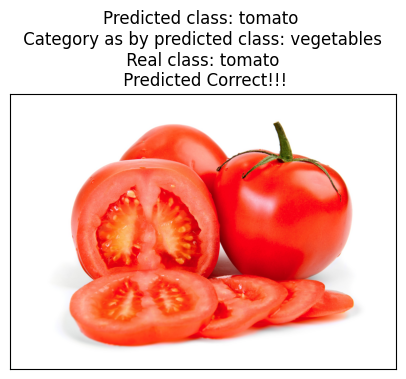

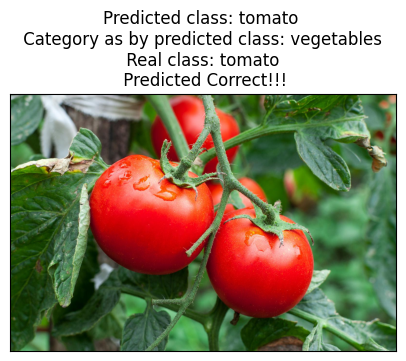

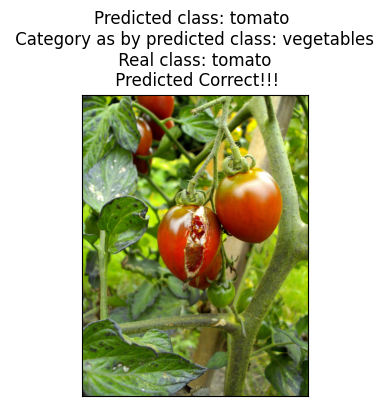

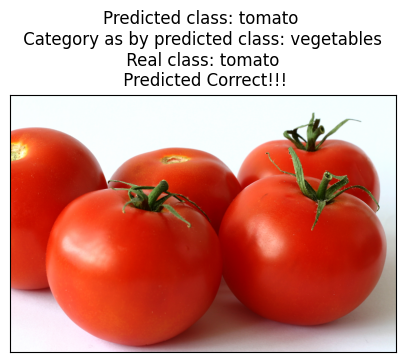

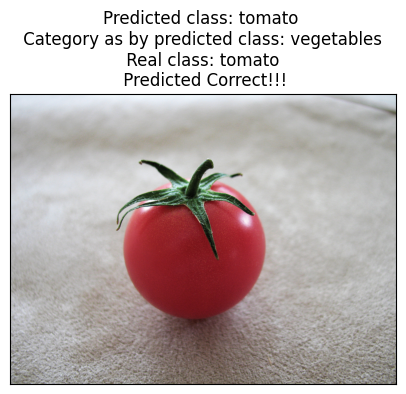

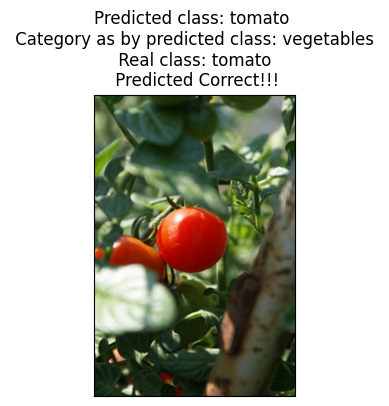

In [8]:
for class_name in os.listdir(test_path):
    # print(class_name)
    class_path = os.path.join(test_path, class_name)
    for image in os.listdir(class_path):
        image_path = os.path.join(test_path, class_name, image)
        predicted = predict(image_path)
        
        # print(f"Predicted: {predicted}, Actual: {class_name}")
        
        # Display the image with the predicted class as the title
        fig, ax = plt.subplots(figsize=(4, 4), subplot_kw={'xticks': [], 'yticks': []})
        ax.imshow(plt.imread(image_path))
        
        if predicted in json_data['fruits']:
            predicted_category = 'fruits'
        elif predicted in json_data['vegetables']:
            predicted_category = 'vegetables'
        else:
            predicted_category = 'unknown'
            
        # if predicted != class_name:
        #     wrong_predict = "Predicted Wrong!!!"
        
        ax.set_title(f"Predicted class: {predicted} \n Category as by predicted class: {predicted_category} \n Real class: {class_name} \n {'Predicted Correct!!!' if predicted == class_name else 'Predicted Wrong!!!'}", fontsize=12)
        
        plt.tight_layout(pad=0.5)
    plt.show()